In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import nn_framework.framework as nn

%load_ext autoreload
%autoreload 2
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.4 * 2, 4.8 * 2)

point_size = 5
cmap = plt.cm.Spectral

Extracting /Users/v-shmyhlo/Datasets/mnist/train-images-idx3-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/train-labels-idx1-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/t10k-labels-idx1-ubyte.gz


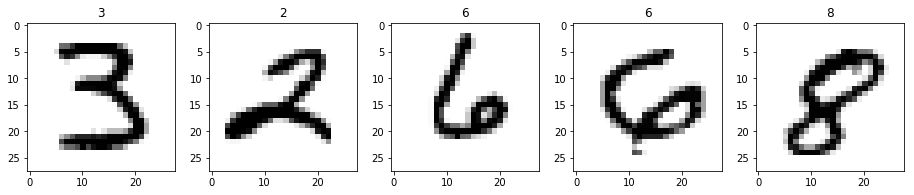

In [2]:
data_path = os.path.expanduser('~/Datasets/mnist')
mnist = input_data.read_data_sets(data_path, one_hot=True)

fig = plt.figure()

for n in range(5):
  i = np.random.randint(mnist.train.num_examples)
  a = fig.add_subplot(1, 5, n + 1)
  a.set_title(np.argmax(mnist.train.labels[i]))
  implot = plt.imshow(mnist.train.images[i].reshape(28, 28))
  implot.set_cmap('binary')

fig.tight_layout()
plt.show()

In [3]:
learning_rate = 0.001
global_step = nn.variable(0)
keep_prob = nn.placeholder('keep_prob', [])

x = nn.placeholder('x', [784, None])
y = nn.placeholder('y', [10, None])

W = nn.variable(np.random.randn(10, 784) * (1.0 / np.sqrt(784)))
b = nn.variable(np.ones([10, 1]))

z = W @ x + b
z = nn.dropout(z, keep_prob)

loss = nn.mean(nn.softmax_cross_entropy(logits=z, labels=y))
y_hat = nn.softmax(z)
train = nn.AdamOptimizer(loss, learning_rate, global_step)

nn.gradient_check(loss, {x: mnist.validation.images[:100].T, y: mnist.validation.labels[:100].T, keep_prob: 1.0})

gradient check: 3.57211486703e-08


3.5721148670340545e-08

step 0: loss: 2.3519766697, accuracy: 0.0932
step 200: loss: 0.710014261489, accuracy: 0.887
step 400: loss: 0.538883366098, accuracy: 0.901
step 600: loss: 0.470034433356, accuracy: 0.9062
step 800: loss: 0.434547290103, accuracy: 0.9104
step 1000: loss: 0.411272635526, accuracy: 0.9144
step 1200: loss: 0.394967797273, accuracy: 0.9158
step 1400: loss: 0.380153100019, accuracy: 0.9166
step 1600: loss: 0.378769609819, accuracy: 0.92
step 1800: loss: 0.368253729865, accuracy: 0.9216
step 2000: loss: 0.362923345839, accuracy: 0.9194
step 2200: loss: 0.359363924111, accuracy: 0.9216
step 2400: loss: 0.358771857004, accuracy: 0.9208
step 2600: loss: 0.349959120656, accuracy: 0.9212
step 2800: loss: 0.346216799188, accuracy: 0.9226
step 3000: loss: 0.343685747173, accuracy: 0.924
step 3200: loss: 0.344128528086, accuracy: 0.9226
step 3400: loss: 0.341300781072, accuracy: 0.9222
step 3600: loss: 0.339311179105, accuracy: 0.9224
step 3800: loss: 0.336279303454, accuracy: 0.923
step 4000: loss

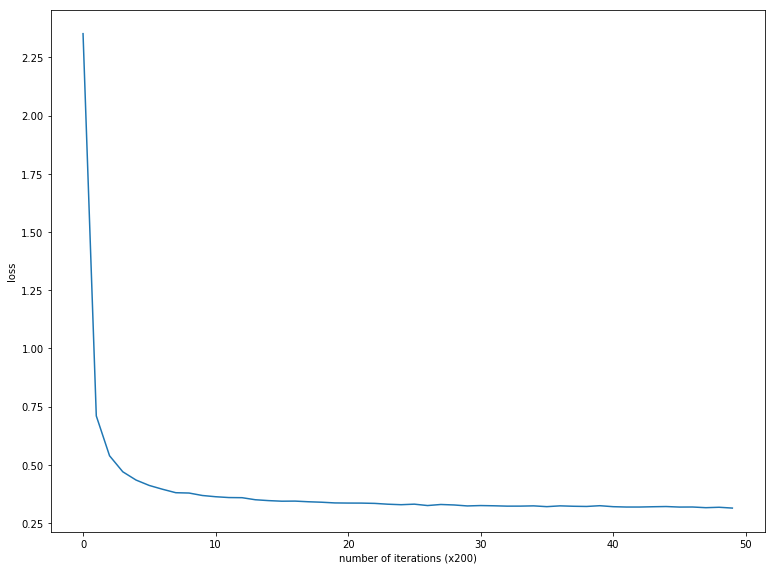

In [4]:
steps = 10000
batch_size = 512
log_interval = 200
kp = 0.5

losses = []
sess = nn.Session()
try:
  for i in range(steps):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run([train], {x: batch_x.T, y: batch_y.T, keep_prob: kp})

    if i % log_interval == 0:
      [l, y_hat_val, y_val] = sess.run([loss, y_hat, y], {x: mnist.validation.images.T, y: mnist.validation.labels.T, keep_prob: 1.0})
      acc = np.mean(np.argmax(y_hat_val, axis=0) == np.argmax(y_val, axis=0))
      print('step %s: loss: %s, accuracy: %s' % (i, l, acc))
      losses.append(l)
finally:
  plt.plot(losses)
  plt.xlabel('number of iterations (x%s)' % log_interval)
  plt.ylabel('loss')
  nn.gradient_check(loss, {x: mnist.validation.images[:100].T, y: mnist.validation.labels[:100].T, keep_prob: 1.0})

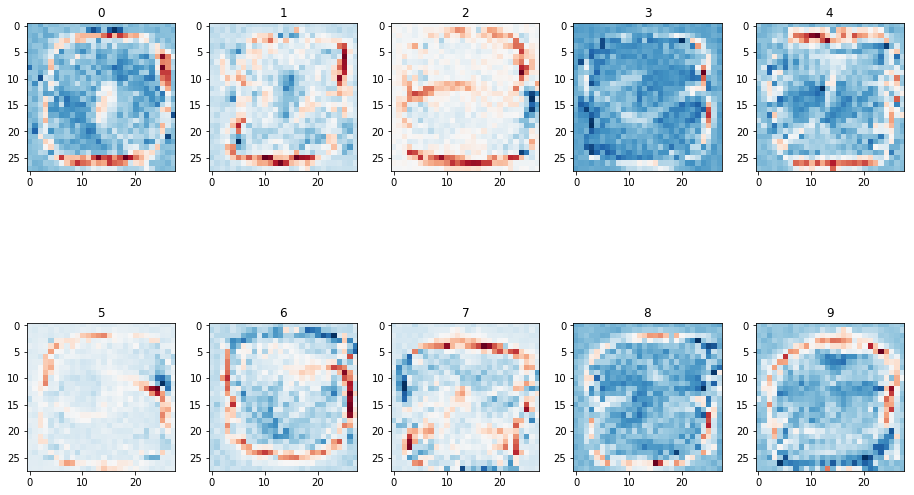

In [5]:
[weights] = sess.run([W])
fig = plt.figure()

for n in range(weights.shape[0]):
  a = fig.add_subplot(2, 5, n + 1)
  a.set_title(n)
  implot = plt.imshow(weights[n, :].reshape(28, 28))
  implot.set_cmap('RdBu')

fig.tight_layout()
plt.show()